<img src="./my_img.png" alt="img" width="600" height="350"/>

<hr>

 <table>
    <tr>
        <th>STT</th>
        <th>Table of Contents</th>
    </tr>
    <tr>
        <th>1</th>
        <th>Importing Libraries</th>
    </tr>
    <tr>
        <th>2</th>
        <th>Loading Data</th>
    </tr>
    <tr>
        <th>3</th>
        <th>Data Cleaning</th>
    </tr>
    <tr>
        <th>4</th>
        <th>Dimensionality Reduction</th>
    </tr>
    <tr>
        <th>5</th>
        <th>Data Visualization</th>
    </tr>
    <tr>
        <th>6</th>
        <th>Clustering</th>
    </tr>
    <tr>
        <th>7</th>
        <th>Evaluating Models</th>
    </tr>
    <tr>
        <th>8</th>
        <th>Conclusion</th>
    </tr>
    <tr>
        <th>9</th>
        <th>End</th>
    </tr>
</table>

<h3>Importing Libraries</h3>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import plotly.express as pe
import datetime
import numpy as np

<h3>Loading Data</h3>

In [43]:
path = './customers.csv'
myData = pd.read_csv(path)
myData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [44]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<h3>Data Cleaning</h3>

In [45]:
myData.dropna(inplace=True)

In [46]:
myData.sort_values(by='Year_Birth').head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0


In [47]:
ids = myData.sort_values(by='Year_Birth').head(3).index
myData.drop(index=ids,inplace=True)

In [48]:
myData['Age'] = datetime.date.today().year - myData['Year_Birth']

In [49]:
myData['Education'].value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [50]:
myData['Education'] = myData['Education'].replace(['2n Cycle','Master','PhD','Graduation'],'Post Graduation')
myData['Education'] = myData['Education'].replace(['Basic'],'Under Graduation')

In [51]:
myData['Marital_Status'].value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [52]:
myData['Marital_Status'] = myData['Marital_Status'].replace(['Married','Together'],'Married')
myData['Marital_Status'] = myData['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')

In [53]:
myData["Kids"] = myData['Kidhome'] + myData['Teenhome']

In [54]:
def getMonth(date):
    today = datetime.datetime.today()
    date_str = str(date.day)+"/"+str(date.month)+"/"+str(date.year)
    temp = datetime.datetime.strptime(date_str,"%d/%m/%Y")
    return (today-temp).days/30

In [55]:
myData['Dt_Customer'] = pd.to_datetime(myData['Dt_Customer'],dayfirst=True,format="%d-%m-%Y")

In [56]:
myData['Time_withCompany'] = [getMonth(dt) for dt in myData['Dt_Customer']]

In [57]:
myData['Spending'] = myData['MntWines'] + myData['MntFruits'] + myData['MntMeatProducts'] + myData['MntFishProducts'] + myData['MntSweetProducts'] + myData['MntGoldProds']

In [58]:
myData['TotalAccepted'] = myData['AcceptedCmp1'] + myData['AcceptedCmp2'] + myData['AcceptedCmp3'] + myData['AcceptedCmp4'] + myData['AcceptedCmp5'] + myData['Response']

<h3>Dimensionality Reduction</h3>

In [59]:
myData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Time_withCompany,Spending,TotalAccepted
0,5524,1957,Post Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,64,0,112.966667,1617,1
1,2174,1954,Post Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,67,2,94.633333,27,0
2,4141,1965,Post Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,56,0,101.266667,776,0
3,6182,1984,Post Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,37,1,95.500000,53,0
4,5324,1981,Post Graduation,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,40,1,96.233333,422,0


In [60]:
myData.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Kids', 'Time_withCompany', 'Spending', 'TotalAccepted'],
      dtype='object')

In [61]:
needDel = ['Year_Birth','Kidhome','Teenhome','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue']
myData.drop(columns=needDel,inplace=True)

In [62]:
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2213.0,5586.899232,3247.819194,0.000000,2815.000000,5455.000000,8420.0,11191.000000
Income,2213.0,52236.581563,25178.603047,1730.000000,35246.000000,51373.000000,68487.0,666666.000000
Recency,2213.0,49.007682,28.941864,0.000000,24.000000,49.000000,74.0,99.000000
MntWines,2213.0,305.153638,337.305490,0.000000,24.000000,175.000000,505.0,1493.000000
MntFruits,2213.0,26.323995,39.735932,0.000000,2.000000,8.000000,33.0,199.000000
MntMeatProducts,2213.0,166.962494,224.226178,0.000000,16.000000,68.000000,232.0,1725.000000
MntFishProducts,2213.0,37.635337,54.763278,0.000000,3.000000,12.000000,50.0,259.000000
MntSweetProducts,2213.0,27.034794,41.085433,0.000000,1.000000,8.000000,33.0,262.000000
MntGoldProds,2213.0,43.911432,51.699746,0.000000,9.000000,24.000000,56.0,321.000000
NumDealsPurchases,2213.0,2.325350,1.924402,0.000000,1.000000,2.000000,3.0,15.000000


<h3>Data Visualization</h3>

<img src='./graph_img.gif' width=400 height=250/>

In [74]:
myData.head(5)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Kids,Time_withCompany,Spending,TotalAccepted
0,5524,Post Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,...,8,10,4,7,0,64,0,112.966667,1617,1
1,2174,Post Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,...,1,1,2,5,0,67,2,94.633333,27,0
2,4141,Post Graduation,Married,71613.0,2013-08-21,26,426,49,127,111,...,8,2,10,4,0,56,0,101.266667,776,0
3,6182,Post Graduation,Married,26646.0,2014-02-10,26,11,4,20,10,...,2,0,4,6,0,37,1,95.500000,53,0
4,5324,Post Graduation,Married,58293.0,2014-01-19,94,173,43,118,46,...,5,3,6,5,0,40,1,96.233333,422,0


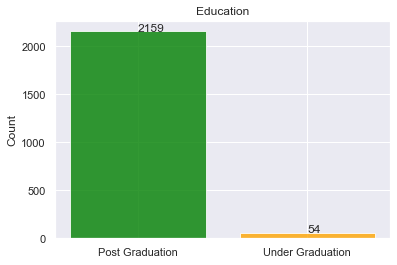

In [103]:
edu = myData['Education'].value_counts()
plt.bar(edu.index,edu.values,color=['green','orange'],alpha=0.8)
plt.title("Education")
plt.ylabel('Count')
for i in range(len(edu)):
    plt.text(edu.index[i],edu.values[i],edu.values[i])